# Описание задачи
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Описание датасета

**school** — аббревиатура школы, в которой учится ученик  
**sex** — пол ученика ('F' - женский, 'M' - мужской)  
**age** — возраст ученика (от 15 до 22)  
**address** — тип адреса ученика ('U' - городской, 'R' - за городом)  
**famsize** — размер семьи('LE3' <= 3, 'GT3' >3)  
**Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)  
**Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
**Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
**Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
**Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
**reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)  
**guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)  
**traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)  
**studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)  
**failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)  
**schoolsup** — дополнительная образовательная поддержка (yes или no)  
**famsup** — семейная образовательная поддержка (yes или no)  
**paid** — дополнительные платные занятия по математике (yes или no)  
**activities** — дополнительные внеучебные занятия (yes или no)  
**nursery** — посещал детский сад (yes или no)  
**higher** — хочет получить высшее образование (yes или no)  
**internet** — наличие интернета дома (yes или no)  
**romantic** — в романтических отношениях (yes или no)  
**famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)  
**freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)  
**goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  
**health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)  
**absences** — количество пропущенных занятий  
**score** — баллы по госэкзамену по математике

In [2]:
# Импортируем библиотеки, загружаем данные, настройки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline


students = pd.read_csv('data/stud_math.csv')

# Первичный осмотр

In [3]:
students.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
# Переименуем часть столбцов
students.rename(columns={'Pstatus': 'p_status', 'Medu': 'm_edu', 'Fedu': 'f_edu', 'Mjob': 'm_job', 'Fjob': 'f_job',
                         'studytime, granular': 'studytime_granular'}, inplace=True)

In [6]:
students.head(10)

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [7]:
students.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              97 non-null     object 
 1   sex                 97 non-null     object 
 2   age                 97 non-null     int64  
 3   address             97 non-null     object 
 4   famsize             97 non-null     object 
 5   p_status            97 non-null     object 
 6   m_edu               97 non-null     float64
 7   f_edu               97 non-null     float64
 8   m_job               97 non-null     object 
 9   f_job               97 non-null     object 
 10  reason              97 non-null     object 
 11  guardian            97 non-null     object 
 12  traveltime          97 non-null     float64
 13  studytime           97 non-null     float64
 14  failures            97 non-null     float64
 15  schoolsup           97 non-null     object 
 16  famsup   

In [8]:
data_info = students.describe(include='all').T
data_info

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395,NaN,NaN,NaN,16.6962,1.27604,15,16,17,18,22
address,378,2,U,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,368,2,GT3,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_status,350,2,T,314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m_edu,392,NaN,NaN,NaN,2.75,1.09813,0,2,3,4,4
f_edu,371,NaN,NaN,NaN,2.61456,2.22873,0,2,2,3,40
m_job,376,5,other,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f_job,359,5,other,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_info[data_info['count'] == students.shape[0]]

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395,NaN,NaN,NaN,16.6962,1.27604,15,16,17,18,22


Данные загрузились из файла корректно. Всего 30 столбцов, хотя в описании фигурирует только 29. Только около 25% строк содержат полные данные, все остальные строки содержат пропуски.

Можно сделать следующие выводы по типам данных:

* **числовые:** age, absences, score, studytime_granular
* **бинарные:**  sex, address, famsize, p_status, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, school (из описания этого не следует, но в данном случае мы видим что фигурирует только два значения)
* **оценочные:** m_edu, f_edu, m_job, f_job, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health

Не содеражат пропуски только три столбца: school, sex, age

Есть один тип данных не фигурирующий в описании: studytime_granular

# Анализ данных

In [10]:
class BoxAnalysis():
    '''Вох анализ с основными показателями'''

    def __init__(self, df, column):
        self.df = df
        self.column = column

    def perc25(self):
        return self.df[self.column].quantile(0.25)

    def perc75(self):
        return self.df[self.column].quantile(0.75)

    def iqr(self):
        return self.perc75() - self.perc25()

    def left(self):
        return self.perc25() - 1.5 * self.iqr()

    def right(self):
        return self.perc75() + 1.5 * self.iqr()

    def __str__(self):
        return '25%: {}, 75%: {}, IQR: {}, Range: [{}, {}].'.format(
            self.perc25(), self.perc75(), self.iqr(),
            self.left(), self.right())

    def __repr__(self):
        return self.__str__()

### studytime_granular

In [11]:
# Есть два столбца с похожими названииями studytime и studytime_granular, посмотрим на них
students.loc[:, ['studytime', 'studytime_granular']]

,studytime,studytime_granular
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [12]:
# судя по всему studytime_granular = -3 * studytime. Посмотрим на корреляцию.
students[['studytime', 'studytime_granular']].corr()

,studytime,studytime_granular
studytime,1.0,-1.0
studytime_granular,-1.0,1.0


In [13]:
# между двумя типами данных наблюдается обратная 100% корреляция, удаляем studytime_granular
students.drop(['studytime_granular'], inplace=True, axis=1)
students.head(10)

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


## absences — количество пропущенных занятий

Количество пропусков: 12


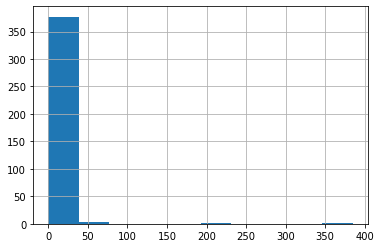

In [14]:
print("Количество пропусков: %d" % students.absences.isnull().sum())
students.absences.hist()

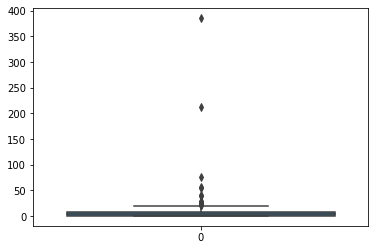

In [15]:
sns.boxplot(data=students.absences)

In [16]:
students.absences.value_counts().sort_index()

0.0      111
1.0        3
2.0       60
3.0        8
4.0       53
5.0        5
6.0       31
7.0        6
8.0       21
9.0        3
10.0      17
11.0       2
12.0      12
13.0       2
14.0      12
15.0       2
16.0       7
17.0       1
18.0       5
19.0       1
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
385.0      1
Name: absences, dtype: int64

Судя по графикам, основное количество данных лежит между 0 и 30 пропусками. Есть потенциальные выбросы свыше 100 пропусков. Для более точного анализа воспользуемся формулой интерквартильного расстояния.

In [17]:
BoxAnalysis(students, 'absences')

25%: 0.0, 75%: 8.0, IQR: 8.0, Range: [-12.0, 20.0].

Судя по результатам вычисления, все пропуски в количестве свыше 20 считаются выбросами, однако если посмотреть на датасет, то пропуски до 30 включительно сгруппированы очень плотно, отфильтруем датасет по пропускам свыше 30.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      388 non-null    object 
 1   sex         388 non-null    object 
 2   age         388 non-null    int64  
 3   address     371 non-null    object 
 4   famsize     361 non-null    object 
 5   p_status    345 non-null    object 
 6   m_edu       385 non-null    float64
 7   f_edu       364 non-null    float64
 8   m_job       369 non-null    object 
 9   f_job       352 non-null    object 
 10  reason      371 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   381 non-null    float64
 14  failures    366 non-null    float64
 15  schoolsup   379 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        348 non-null    object 
 18  activities  374 non-null    object 
 19  nursery     372 non-null    o

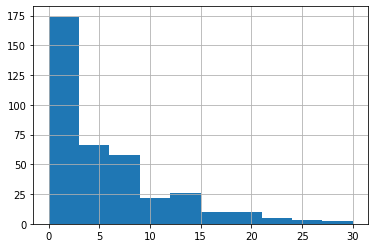

In [18]:
students = students.loc[(
    students.absences <= 30) | (pd.isnull(students.absences))]
students.absences.hist()
students.info()

In [19]:
students.absences.describe()

count    376.000000
mean       5.127660
std        5.854656
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       30.000000
Name: absences, dtype: float64

Среднее значение пропусков - 5. Заметен тренд на уменьшение количества учеников при увеличении количества пропусков.

## age — возраст ученика (от 15 до 22)

Количество пропусков: 12


count    388.000000
mean      16.675258
std        1.262746
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

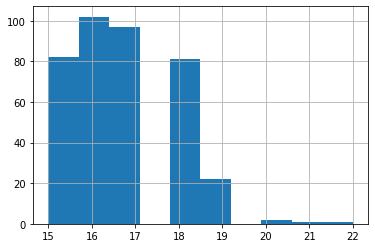

In [20]:
print("Количество пропусков: %d" % students.absences.isnull().sum())

students.age.hist()
students.age.describe()

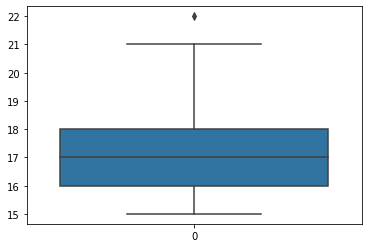

In [21]:
sns.boxplot(data=students.age)

По графикам видно, что выбросами являются студенты с возрастом в 22 года, рассчитаем границы.

In [22]:
BoxAnalysis(students, 'age')

25%: 16.0, 75%: 18.0, IQR: 2.0, Range: [13.0, 21.0].

Верхняя граница действительно проходит по возрасту 21, однако в условии фигурирует возраст 22 года, да и разница между 22-летним и 21-летним может быть всего в один день. Заменяем 22 года на 21 год.

In [23]:
students.loc[students['age'] == 22.0, 'age'] = 21.0

/Users/minchik/.pyenv/versions/3.8.2/envs/sps/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
display(pd.DataFrame(students.groupby(['age']).score.agg(
    ['count', 'max', 'min', 'mean'])))
display(students.age.median())

,count,max,min,mean
age,,,,
15.0,82,95.0,0.0,56.280488
16.0,101,100.0,0.0,54.900990
17.0,97,90.0,0.0,51.494845
18.0,79,95.0,0.0,48.354430
19.0,19,65.0,0.0,39.473684
20.0,2,90.0,75.0,82.500000
21.0,2,40.0,35.0,37.500000


17.0

Медиана смещена влево. Большинство учеников младше 18 лет. В целом можно сделать вывод о том, что чем старше ученик, тем хуже у него успеваемость.

## score — баллы по госэкзамену по математике

Количество пропусков: 6


count    382.000000
mean      52.264398
std       23.043739
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

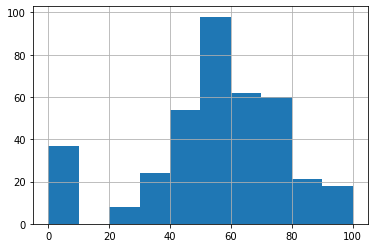

In [25]:
print("Количество пропусков: %d" % students.score.isnull().sum())

students.score.hist()
students.score.describe()

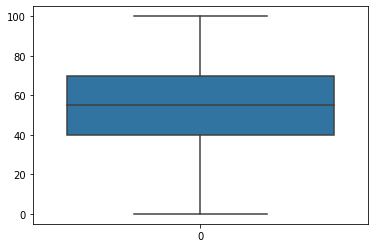

In [26]:
sns.boxplot(data=students.score)

In [27]:
students.score.value_counts().sort_index()

0.0      37
20.0      1
25.0      7
30.0     15
35.0      9
40.0     29
45.0     25
50.0     54
55.0     44
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      5
90.0     12
95.0      5
100.0     1
Name: score, dtype: int64

In [28]:
BoxAnalysis(students, 'score')

25%: 40.0, 75%: 70.0, IQR: 30.0, Range: [-5.0, 115.0].

Судя по рассчетам, выбросов нет, однако можно обратить внимание на столбец с нулевыми значениями. Вероятность того, что почти 10% учащихся не могут набрать хотя бы 5 балов из 100, на мой взгляд, очень мала. Скорее всего нули в данных представляют собой учащихся, которые не учавстовали в итоговом экзамене. Удаляем пропуски и нули.

In [29]:
students = students.loc[students.score > 0]

count    345.000000
mean      57.869565
std       16.211639
min       20.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

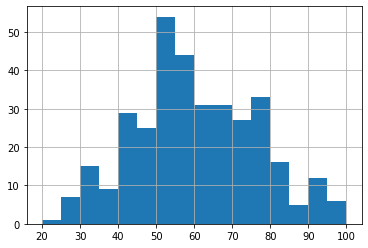

In [30]:
students.score.hist(bins=16)
students.score.describe()

Средний бал - 58. Распределенине нормальное, без выбросов.

## school — аббревиатура школы, в которой учится ученик

In [31]:
print("Количество пропусков: %d" % students.school.isnull().sum())

display(pd.DataFrame(students.school.value_counts()))

Количество пропусков: 0


,school
GP,305
MS,40


In [32]:
students.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  345 non-null    object
dtypes: object(1)
memory usage: 5.4+ KB


У нас две школы, пропусков нет. Учащихся в GP значительно больше чем в MS.

## sex — пол ученика ('F' - женский, 'M' - мужской)

In [33]:
print("Количество пропусков: %d" % students.sex.isnull().sum())

display(pd.DataFrame(students.sex.value_counts()))

Количество пропусков: 0


,sex
F,177
M,168


2 уникальных значения. В оставшемся датасете парни и девушки представлены практически одинаково.

## address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [34]:
print("Количество пропусков: %d" % students.address.isnull().sum())

display(pd.DataFrame(students.address.value_counts()))

Количество пропусков: 14


,address
U,260
R,71


2 уникальных значения. В оставшемся датасете учеников из города присутствует намного больше, чем из-за города.

## famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [35]:
print("Количество пропусков: %d" % students.famsize.isnull().sum())

display(pd.DataFrame(students.famsize.value_counts()))

Количество пропусков: 24


,famsize
GT3,223
LE3,98


2 уникальных значения. У большинства из представленных учеников в семье более 3 человек.

## p_status — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [36]:
print("Количество пропусков: %d" % students.p_status.isnull().sum())

display(pd.DataFrame(students.p_status.value_counts()))

Количество пропусков: 39


,p_status
T,274
A,32


2 уникальных значения. В большинстве случаев, родители живут вместе. Сравнительно большое количество пропусков.

## m_edu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [37]:
print("Количество пропусков: %d" % students.m_edu.isnull().sum())

display(pd.DataFrame(students.m_edu.value_counts()))

Количество пропусков: 2


,m_edu
4.0,124
2.0,85
3.0,84
1.0,47
0.0,3


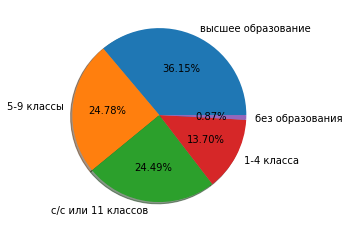

In [38]:
education_mappings = {0.0: 'без образования', 1.0: '1-4 класса',
                      2.0: '5-9 классы', 3.0: 'c/c или 11 классов',
                      4.0: 'высшее образование'}
labels = students.m_edu.replace(
    education_mappings
).value_counts().reset_index()['index'].to_list()
fig, axes = plt.subplots()

axes.pie(students.m_edu.value_counts(), labels=labels,
         autopct='%1.2f%%', shadow=True)
plt.show()

5 уникальных значений. Значения распределены примерно равномерно, за исключением матерей без образования. 

## f_edu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [39]:
print("Количество пропусков: %d" % students.f_edu.isnull().sum())


display(pd.DataFrame(students.f_edu.value_counts()))

Количество пропусков: 21


,f_edu
2.0,92
3.0,85
4.0,79
1.0,65
0.0,2
40.0,1


Бросается в глаза одно неверное значние 40.0, судя по имеющимся вариантам ответов, это всего-навсего ошибка ввода. Заменим значение 40 на 4.

In [40]:
students.loc[students['f_edu'] == 40.0, 'f_edu'] = 4.0

/Users/minchik/.pyenv/versions/3.8.2/envs/sps/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


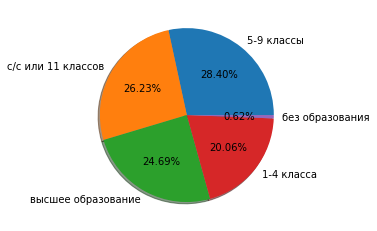

In [41]:
labels = students.f_edu.replace(
    education_mappings
).value_counts().reset_index()['index'].to_list()
fig, axes = plt.subplots()

axes.pie(students.f_edu.value_counts(), labels=labels,
         autopct='%1.2f%%', shadow=True)
plt.show()

5 уникальных значений. Так же как с образованием матерей, распределенния практически равномерное, за исключением отцов без образования, таких обсолютное меньшество

## m_job, f_job — работа матери/отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [42]:
print("Количество пропусков m_job: %d" % students.m_job.isnull().sum())
print("Количество пропусков f_job: %d" % students.f_job.isnull().sum())

display(pd.DataFrame(students.m_job.value_counts()))
display(pd.DataFrame(students.f_job.value_counts()))

Количество пропусков m_job: 17
Количество пропусков f_job: 32


,m_job
other,111
services,88
teacher,50
at_home,49
health,30


,f_job
other,174
services,85
teacher,25
health,15
at_home,14


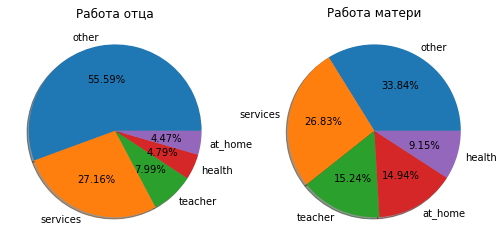

In [43]:
job_labels_m = students.m_job.value_counts().reset_index()['index'].to_list()
job_labels_f = students.f_job.value_counts().reset_index()['index'].to_list()
fig, axes = plt.subplots(0, 2, figsize=(6, 3))


axes = fig.add_axes([0, 0, 0.5, 1])
axes.pie(students.f_job.value_counts(), labels=job_labels_f,
         autopct='%1.2f%%', shadow=True)
plt.title('Работа отца')

axes = fig.add_axes([0.6, 0, 0.5, 1])
axes.pie(students.m_job.value_counts(), labels=job_labels_m,
         autopct='%1.2f%%', shadow=True)
plt.title('Работа матери')

plt.show()

5 уникальных значений. Болшиннство отцов и матерей работают в сферах, в списке не перечисленных. Так же видно, что в процентном соотношении, неработающих матерей сильно больше, чем отцов. 

## reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [44]:
print("Количество пропусков: %d" % students.reason.isnull().sum())

pd.DataFrame(students.reason.value_counts())

Количество пропусков: 15


,reason
course,118
reputation,93
home,87
other,32


4 уникальных значения. Как показывают данные, самую большую группу представляют ученики выбравшие школу из-за учебной прогрраммы. Чуть менее важным фактором при выборе школы является репутация и близость к дому.

## guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [45]:
print("Количество пропусков: %d" % students.reason.isnull().sum())

pd.DataFrame(students.guardian.value_counts())

Количество пропусков: 15


,guardian
mother,221
father,78
other,18


3 уникальных значения. Подавляющим количеством опекунов являются матери, на мой взгляд эта же тенденция наблюдается в общем по всему миру, заполним пропуски значением "мать"

In [46]:
students.guardian = students.guardian.fillna('mother')
pd.DataFrame(students.guardian.value_counts())

/Users/minchik/.pyenv/versions/3.8.2/envs/sps/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,guardian
mother,249
father,78
other,18


## traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [47]:
print("Количество пропусков: %d" % students.traveltime.isnull().sum())

pd.DataFrame(students.traveltime.value_counts())

Количество пропусков: 23


,traveltime
1.0,214
2.0,84
3.0,17
4.0,7


4 уникальных значения. Большинство учеников добирается до школы меньше 15 минут.

## studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [48]:
print("Количество пропусков: %d" % students.studytime.isnull().sum())

pd.DataFrame(students.studytime.value_counts())

Количество пропусков: 7


,studytime
2.0,168
1.0,89
3.0,57
4.0,24


4 уникальных значения. Большинство учеников занимается от 2 до 5 часов. Однако вторая по велчине группа (83 человека), тратит на учебу помимо школы меньше 2 часов в неделю.

## failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [49]:
print("Количество пропусков: %d" % students.failures.isnull().sum())

pd.DataFrame(students.failures.value_counts())

Количество пропусков: 20


,failures
0.0,269
1.0,36
2.0,10
3.0,10


4 уникальных значения. Подавляющее количество строк имеет значение 0. В данном случае 0 не значит, что не было неудач, сюда так же входят ученики с количеством неудач > 3. На мой взгляд,именно из-за этого 0 - значение, которое встречается чаще всего. Считаю, что можно заполнить пропуски этим же значением.

In [50]:
students.failures = students.failures.fillna(0.0)
pd.DataFrame(students.failures.value_counts())

/Users/minchik/.pyenv/versions/3.8.2/envs/sps/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,failures
0.0,289
1.0,36
2.0,10
3.0,10


## schoolsup — дополнительная образовательная поддержка (yes или no)

In [51]:
print("Количество пропусков: %d" % students.schoolsup.isnull().sum())

pd.DataFrame(students.schoolsup.value_counts())

Количество пропусков: 9


,schoolsup
no,290
yes,46


2 уникальных значения. Подавляющее количество учеников не имело дополнительной образовательной поддержки.

## famsup — семейная образовательная поддержка (yes или no)

In [52]:
print("Количество пропусков: %d" % students.famsup.isnull().sum())

pd.DataFrame(students.famsup.value_counts())

Количество пропусков: 34


,famsup
yes,192
no,119


2 уникальных значения. Большинство учеников получали семейную образовательную поддержку.

## paid — дополнительные платные занятия по математике (yes или no)

In [53]:
print("Количество пропусков: %d" % students.paid.isnull().sum())

pd.DataFrame(students.paid.value_counts())

Количество пропусков: 36


,paid
no,166
yes,143


2 уникальных значения. Большинство учеников не посящало платные занятия.

## activities — дополнительные внеучебные занятия (yes или no)

In [54]:
print("Количество пропусков: %d" % students.activities.isnull().sum())

pd.DataFrame(students.activities.value_counts())

Количество пропусков: 12


,activities
yes,170
no,163


2 уникальных значения. По посещению/не посещению дополнительных внеучебных занятий ученики разделились практически поровну

## nursery — посещал детский сад (yes или no)

In [55]:
print("Количество пропусков: %d" % students.nursery.isnull().sum())

pd.DataFrame(students.nursery.value_counts())

Количество пропусков: 12


,nursery
yes,266
no,67


2 уникальных значения. Большинство учеников посещало детский сад

## higher — хочет получить высшее образование (yes или no)

In [56]:
print("Количество пропусков: %d" % students.higher.isnull().sum())

pd.DataFrame(students.higher.value_counts())

Количество пропусков: 19


,higher
yes,314
no,12


2 уникальных значения. Подавляющее количество учеников хочет получить высшее образование, думаю возможно заполнить пропуски ответом **yes**

In [57]:
students.higher = students.higher.fillna('yes')
pd.DataFrame(students.higher.value_counts())

/Users/minchik/.pyenv/versions/3.8.2/envs/sps/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,higher
yes,333
no,12


## internet — наличие интернета дома (yes или no)

In [58]:
print("Количество пропусков: %d" % students.internet.isnull().sum())

pd.DataFrame(students.internet.value_counts())

Количество пропусков: 29


,internet
yes,268
no,48


2 уникальных значения. Подавляющее количество учеников имеет домашний интернет. Учитывая показатели образования родителей, а так же факт того, что половина учеников посещала платные занятия по матемаатике, думаю, что речь идет не о беднейщих странах мира, а значит вероятность наличия интернета в доме для пропущеных значений очень велика.

In [59]:
students.internet = students.internet.fillna('yes')
pd.DataFrame(students.internet.value_counts())

/Users/minchik/.pyenv/versions/3.8.2/envs/sps/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,internet
yes,297
no,48


## romantic — в романтических отношениях (yes или no)

In [60]:
print("Количество пропусков: %d" % students.romantic.isnull().sum())

pd.DataFrame(students.romantic.value_counts())

Количество пропусков: 29


,romantic
no,216
yes,100


2 уникальных значения. Большинство учеников не имеют романтических отношений

## famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [61]:
print("Количество пропусков: %d" % students.famrel.isnull().sum())

pd.DataFrame(students.famrel.value_counts())

Количество пропусков: 23


,famrel
4.0,160
5.0,86
3.0,56
2.0,13
1.0,6
-1.0,1


Думаю, что значение -1.0 является ошибкой ввода, исправляем на 1.0

In [62]:
students.loc[students.famrel == -1, 'famrel'] = 1.0
pd.DataFrame(students.famrel.value_counts())

/Users/minchik/.pyenv/versions/3.8.2/envs/sps/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,famrel
4.0,160
5.0,86
3.0,56
2.0,13
1.0,7


5 уникальных значений. Большинство учеников находится в хороших семейных отношениях

## freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [63]:
print("Количество пропусков: %d" % students.freetime.isnull().sum())

pd.DataFrame(students.freetime.value_counts())

Количество пропусков: 7


,freetime
3.0,129
4.0,102
2.0,59
5.0,34
1.0,14


5 уникальных значений. У большинства учеников достаточно свободного времени

## goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [64]:
print("Количество пропусков: %d" % students.goout.isnull().sum())

pd.DataFrame(students.goout.value_counts())

Количество пропусков: 6


,goout
3.0,116
2.0,91
4.0,72
5.0,43
1.0,17


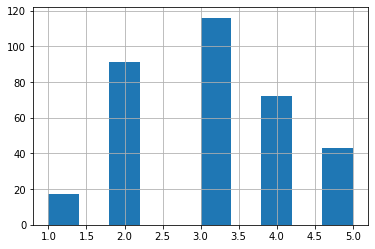

In [65]:
students.goout.hist()

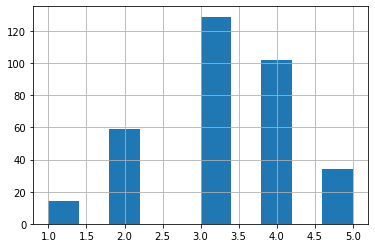

In [66]:
students.freetime.hist()

5 уникальных значений. Как и с **freetime**, большинство учеников проводят достаточно времени со своими друзьями. Если присмотреться, то можно увидеть некоторую кореляцию между ними.

In [67]:
students[['goout', 'freetime']].corr()

,goout,freetime
goout,1.000000,0.281338
freetime,0.281338,1.000000


In [68]:
students[pd.isnull(students.goout) | pd.isnull(students.freetime)][['goout', 'freetime']]

,goout,freetime
32,2.0,NaN
89,NaN,1.0
92,NaN,3.0
200,NaN,3.0
202,NaN,4.0
241,NaN,3.0
280,4.0,NaN
290,2.0,NaN
291,2.0,NaN
311,1.0,NaN


Между двумя показателям наблюдается хорошая кореляция, заменим пустые значения **goout** на значения из **freetime** и наоборот.

In [69]:
students.loc[pd.isnull(students.goout), 'goout'] = students.loc[pd.isnull(students.goout), 'freetime']
students.loc[pd.isnull(students.freetime), 'freetime'] = students.loc[pd.isnull(students.freetime), 'goout']

/Users/minchik/.pyenv/versions/3.8.2/envs/sps/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## health  — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [70]:
print("Количество пропусков: %d" % students.goout.isnull().sum())

pd.DataFrame(students.health.value_counts())

Количество пропусков: 0


,health
5.0,122
3.0,79
4.0,51
1.0,44
2.0,36


5 уникальных значений. Большинство учеников имеют уровень здоровья 3 и выше, что свидетельствует об удовлетворительном, либо хорошем уровне здоровья

# Корреляционный анализ количественных переменных

In [71]:
students_n = students[['absences', 'age', 'score']]

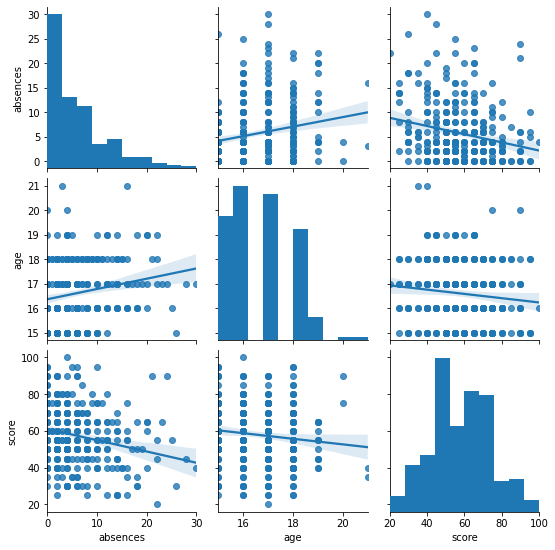

In [72]:
sns.pairplot(students_n, kind='reg')

In [73]:
students_n.corr()

,absences,age,score
absences,1.000000,0.201880,-0.226403
age,0.201880,1.000000,-0.115359
score,-0.226403,-0.115359,1.000000


Как было замечено ранее, между возрастом и оценкой обратная зависимость, чем больше возраст, тем хуже оценка. Так же можно заметить обратную зависимость между пропущеными занятями и итоговой оценкой.

Оставляем оба критерия, между ними не большая кореляция

# Анализ номинативных переменных

In [74]:
def boxplot(col):
    fig, axes = plt.subplots(figsize=(12, 4))
    sns.boxplot(x=col, y='score', data=students, ax=axes)
    axes.set_title(f'Boxplot for {col}')

In [75]:
nominatives = ['school', 'sex', 'address', 'famsize',
               'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job',
               'reason', 'guardian', 'traveltime',
               'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
               'activities', 'nursery', 'higher', 'internet',
               'romantic', 'famrel', 'freetime', 'goout', 'health']

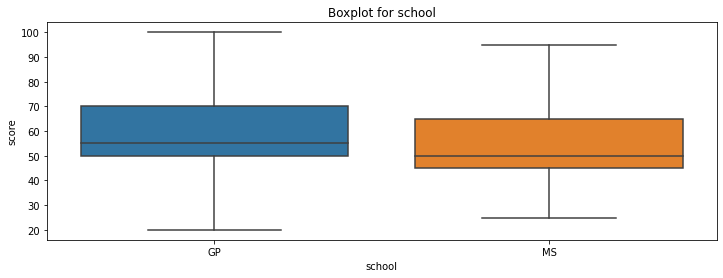

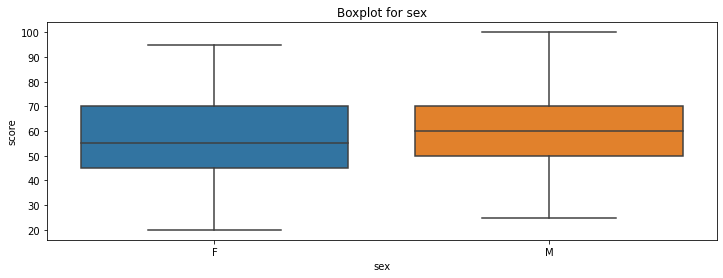

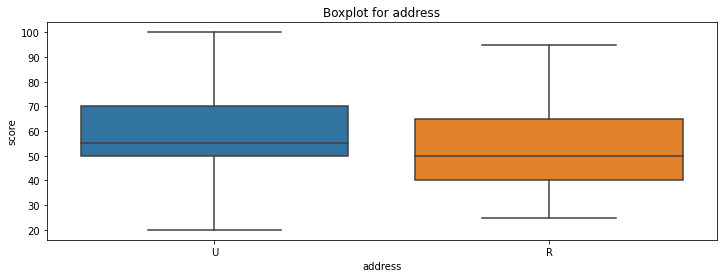

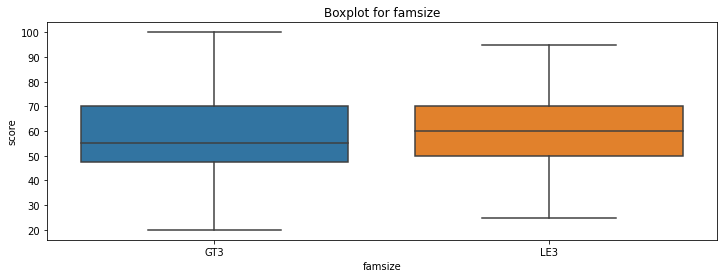

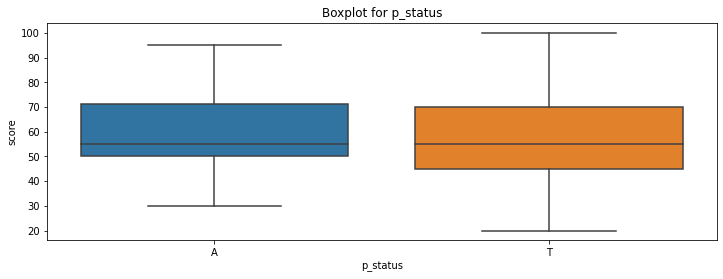

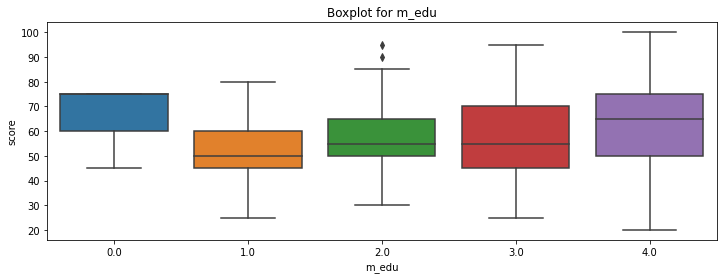

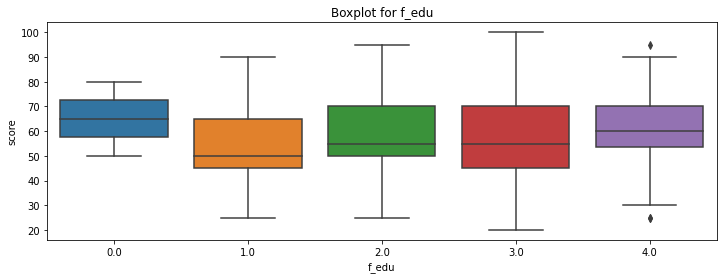

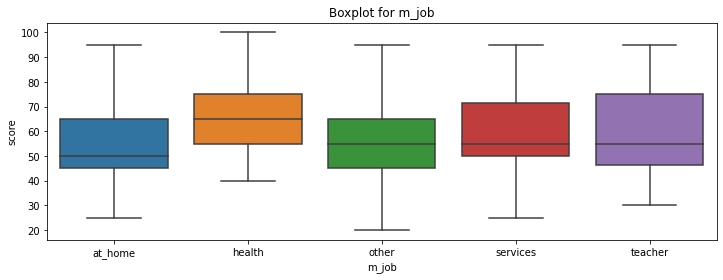

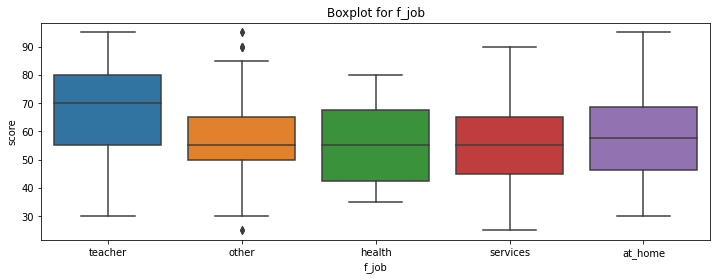

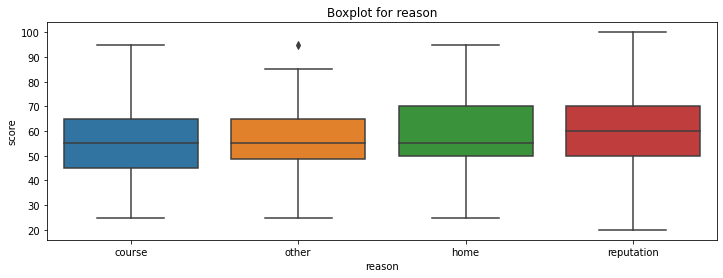

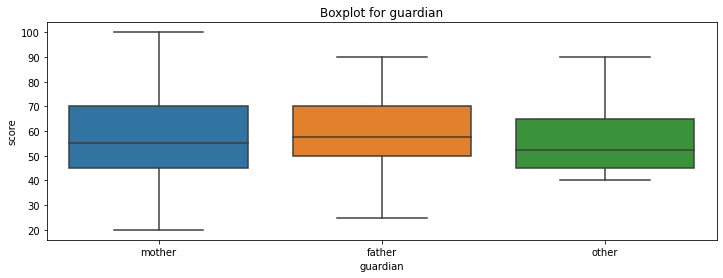

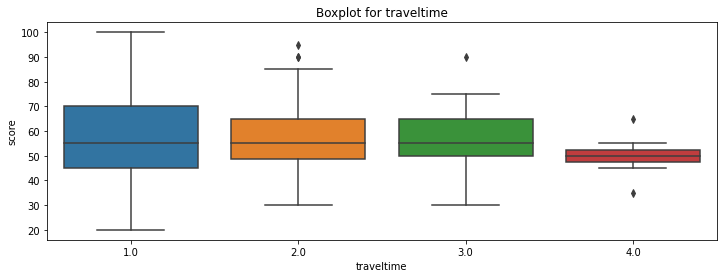

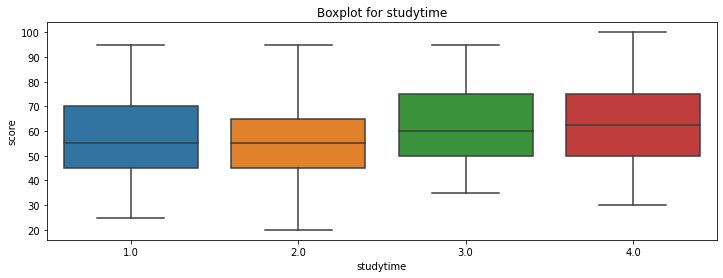

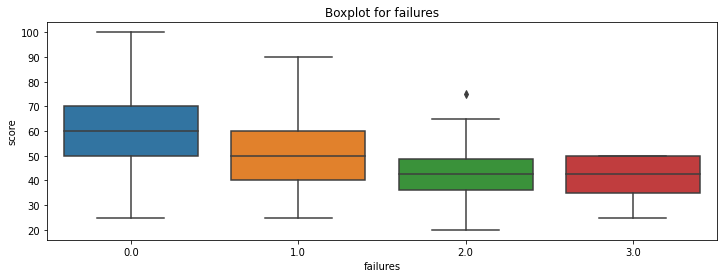

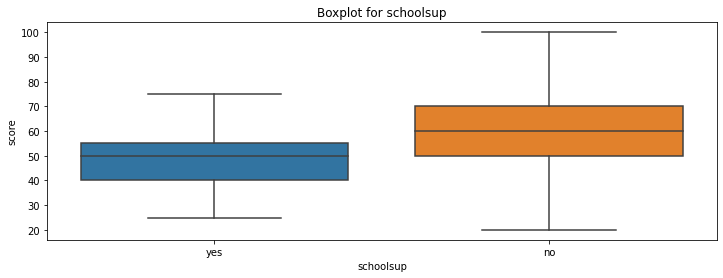

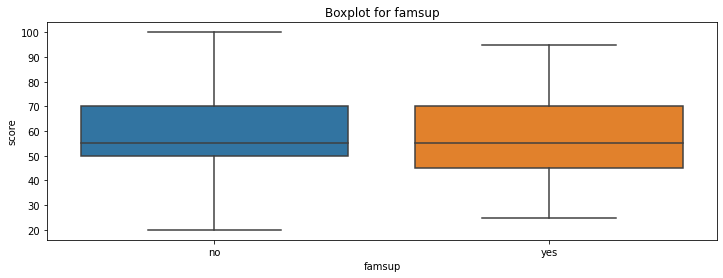

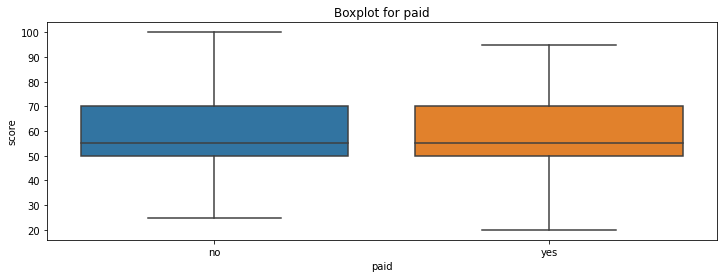

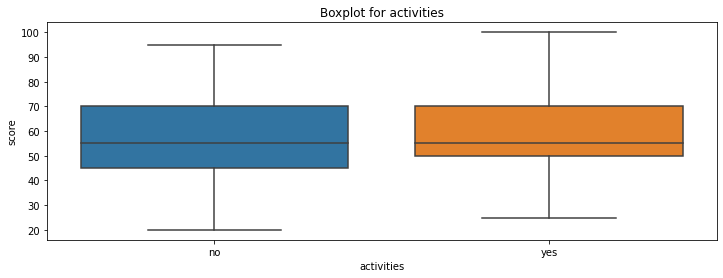

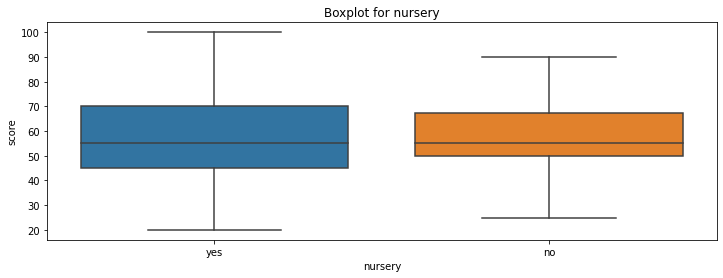

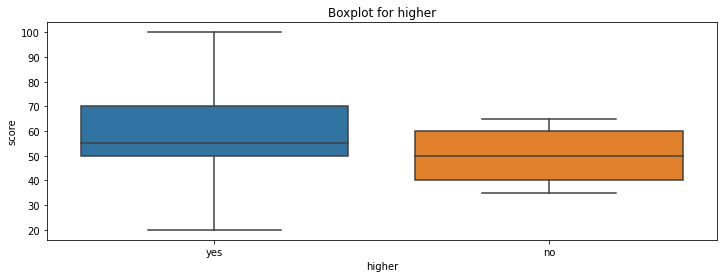

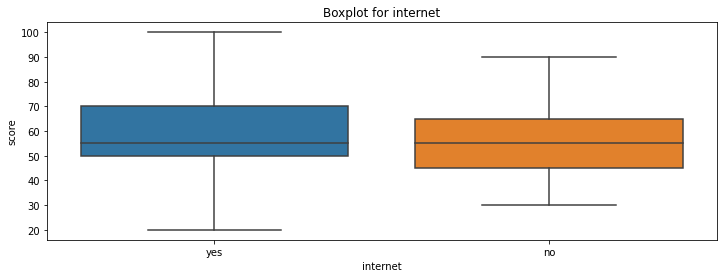

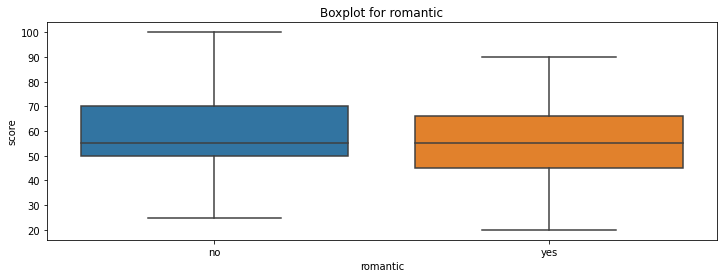

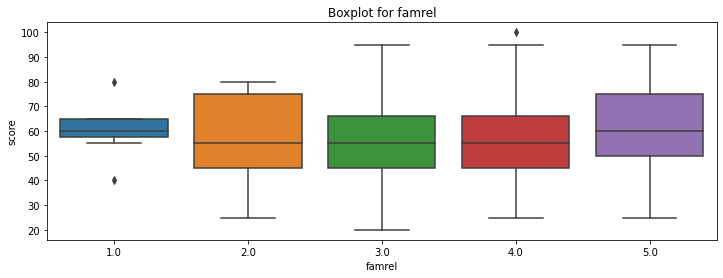

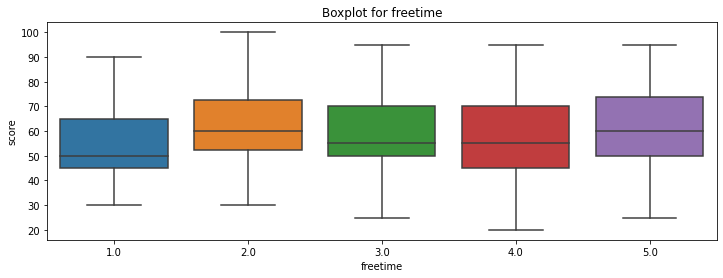

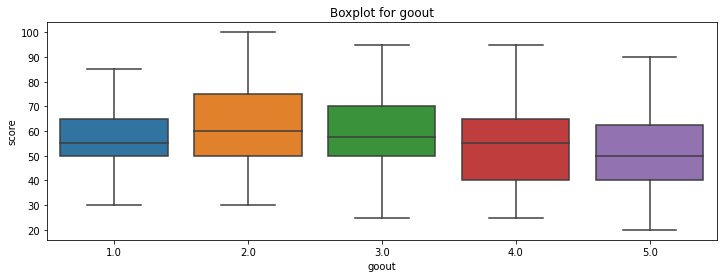

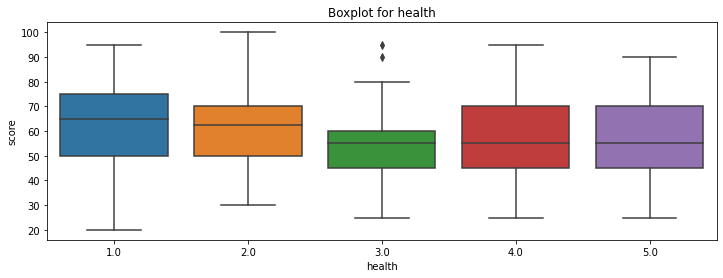

In [76]:
for column in nominatives:
    boxplot(column)

При беглом осмотре графиков видно, что на итоговую оценку не влияют: famsize, reason, guardian, paid.

Дополнительно проверим наши результаты с помощью Теста Стьюдента.

# Тест Стьюдента

In [77]:
def get_stat_dif(column):
    result = []
    cols = students.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [78]:
for col in nominatives:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки f_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


По результатом теста Стьюдента, статистические значимые различия найдены для следюющих колонок: 'sex', 'address', 'm_edu', 'f_edu', 'm_job', 'studytime', 'failures', 'schoolsup', 'goout'.
Оставим эти переменные в датасете для дальнейшего построения модели.

In [79]:
result = ['sex', 'address', 'm_edu', 'f_edu', 'm_job',
          'studytime', 'failures', 'schoolsup', 'goout']

В нашем случае важными итоговыми переменными, которые, возможно, влиияют на итоговую оценку ученика, являются: 'sex', 'address', 'm_edu', 'f_edu', 'm_job', 'studytime', 'failures', 'schoolsup', 'goout', 'age', 'absences'.

In [80]:
result.extend(['age', 'absences'])
result

['sex',
 'address',
 'm_edu',
 'f_edu',
 'm_job',
 'studytime',
 'failures',
 'schoolsup',
 'goout',
 'age',
 'absences']

In [81]:
students_result = students.loc[:, result+['score']]
students_result.info()
students_result.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 394
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        345 non-null    object 
 1   address    331 non-null    object 
 2   m_edu      343 non-null    float64
 3   f_edu      324 non-null    float64
 4   m_job      328 non-null    object 
 5   studytime  338 non-null    float64
 6   failures   345 non-null    float64
 7   schoolsup  336 non-null    object 
 8   goout      345 non-null    float64
 9   age        345 non-null    float64
 10  absences   335 non-null    float64
 11  score      345 non-null    float64
dtypes: float64(8), object(4)
memory usage: 45.0+ KB


,sex,address,m_edu,f_edu,m_job,studytime,failures,schoolsup,goout,age,absences,score
0,F,U,4.0,4.0,at_home,2.0,0.0,yes,4.0,18.0,6.0,30.0
1,F,U,1.0,1.0,at_home,2.0,0.0,no,3.0,17.0,4.0,30.0
2,F,U,1.0,1.0,at_home,2.0,3.0,yes,2.0,15.0,10.0,50.0
3,F,U,4.0,2.0,health,3.0,0.0,no,2.0,15.0,2.0,75.0
4,F,U,3.0,3.0,other,2.0,0.0,no,2.0,16.0,4.0,50.0
5,M,U,4.0,3.0,services,2.0,0.0,no,2.0,16.0,10.0,75.0
6,M,NaN,2.0,2.0,other,2.0,0.0,no,4.0,16.0,0.0,55.0
7,F,U,4.0,4.0,other,2.0,0.0,yes,4.0,17.0,6.0,30.0
8,M,U,3.0,2.0,services,2.0,0.0,no,2.0,15.0,0.0,95.0
9,M,U,3.0,4.0,other,2.0,0.0,no,1.0,15.0,0.0,75.0


# Корреляционный анализ бинарных переменных

Заменим бинарные значения на числа, и посмотрим кореляцию

In [82]:
students_result_nums = students_result.copy()

for column in (students_result_nums.select_dtypes('object').columns):
    replacements = {}
    for i, col in enumerate(students_result_nums[column].sort_values().unique()):
        if not pd.isna(col):
            replacements[col] = i

    if len(replacements) == 2:
        print("%s - %s" % (column, replacements))
        students_result_nums = students_result_nums.replace(
            {column: replacements})

students_result_nums.head(10)

sex - {'F': 0, 'M': 1}
address - {'R': 0, 'U': 1}
schoolsup - {'no': 0, 'yes': 1}


,sex,address,m_edu,f_edu,m_job,studytime,failures,schoolsup,goout,age,absences,score
0,0,1.0,4.0,4.0,at_home,2.0,0.0,1.0,4.0,18.0,6.0,30.0
1,0,1.0,1.0,1.0,at_home,2.0,0.0,0.0,3.0,17.0,4.0,30.0
2,0,1.0,1.0,1.0,at_home,2.0,3.0,1.0,2.0,15.0,10.0,50.0
3,0,1.0,4.0,2.0,health,3.0,0.0,0.0,2.0,15.0,2.0,75.0
4,0,1.0,3.0,3.0,other,2.0,0.0,0.0,2.0,16.0,4.0,50.0
5,1,1.0,4.0,3.0,services,2.0,0.0,0.0,2.0,16.0,10.0,75.0
6,1,NaN,2.0,2.0,other,2.0,0.0,0.0,4.0,16.0,0.0,55.0
7,0,1.0,4.0,4.0,other,2.0,0.0,1.0,4.0,17.0,6.0,30.0
8,1,1.0,3.0,2.0,services,2.0,0.0,0.0,2.0,15.0,0.0,95.0
9,1,1.0,3.0,4.0,other,2.0,0.0,0.0,1.0,15.0,0.0,75.0


In [83]:
students_result_nums.corr()['score']

sex          0.108513
address      0.138212
m_edu        0.195112
f_edu        0.139045
studytime    0.140376
failures    -0.284017
schoolsup   -0.273175
goout       -0.168034
age         -0.115359
absences    -0.226403
score        1.000000
Name: score, dtype: float64

Мальчики, городские жители и ученики без дополнительной образовательной поддержки имеют больший бал по сравнению с девочками, учениками живущими за городом и учениками с дополнительной образовательной поддержкой

# Выводы

1. Только 25% первоначальных строк содержали все наборы данных. 3 столбца были заполнены полностью.
2. Были найдены выбросы:  
    * в столбце возраст, заменено на 21  
    * в столбце пропущеных занятий выбросы удалены
3. В столбце с результатами экзаменов значение равные 0 были удалены, т.к. скорее всего представляют собой учащихся не принявших участие в финальном испытании.
4. Девочки получили результаты хуже, чем мальчики.
5. Результаты у городских детей лечше, чем у детей живущих за городом.
6. Образование родителей положительно влияет на результат детей по математике.
7. Время потраченное на учебу положительно влияет на оценку.
7. Количество внеучебных неудач отрицательно влияет на результат, хотя 0 в данном случае может включать достаточно большие неудачи (>3), возможно их не так много, что повлиять на результат.
8. Подержка школы отрицательно влияет на результаты учеников, что кажется не логичным, возможно она оказывается ученикам, которые плохо успевают в учебе.
9. Чем больше времени проводишь с друзьями, тем хуже оценка, что логично, т.к. меньше уделяешь внимание учебе.
10. Чем старше ученик, тем хуже у него оценки, возможно речь идет об учениках, которые остаются на второй год.
11. Пропуски отрицательно влияют на итоговую оценку.
11. Работа матери так же влияет на итоговую оценку, возможно это связано с достаточно большим процентом неработающих матерей по сравнению с отцами.
4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это **sex**, **address**, **m_edu**, **f_edu**, **m_job**, **studytime**, **failures**, **schoolsup**, **goout**, **age**, **absences**